In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import numpy as np
import os, cv2, random, glob
import matplotlib.image as mpimg
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, CSVLogger 
%matplotlib inline 

C:\Users\Rodrigo Valentim\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Treinamento teste para uma pequena quantidade de imagens

In [2]:
img_width, img_height = 150, 150
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
test_data_dir = 'data/teste'

nb_validation_samples = 800
nb_train_samples = 23700
epochs = 50
batch_size = 16


def deep():

    if K.image_data_format() == 'channels_first':
        input_shape = (3, img_width, img_height)
    else:
        input_shape = (img_width, img_height, 3)  
  
    model = Sequential()
    model.add(Conv2D(32,(3, 3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    return model

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')



Found 23700 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [4]:
model = deep()
epoch_num = 1 
outputFolder = ''
file_ini = outputFolder+'weights-improvement-01-0.73.hdf5'
filename =  glob.glob(file_ini)

model.load_weights(file_ini)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
outputFolder = ''

callbacks = ModelCheckpoint("weights-improvement-{epoch:02d}-{acc:.2f}.hdf5", monitor='acc', verbose=0, save_best_only=False,
                                save_weights_only=False, mode='auto', period=1)
callbacks_list = [callbacks]

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=30,
    callbacks = callbacks_list, initial_epoch = epoch_num,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size

);

Epoch 2/30
1481/1481 [==============================] - 1119s 756ms/step - loss: 0.4829 - acc: 0.7772 - val_loss: 0.3268 - val_acc: 0.8525
Epoch 3/30
1481/1481 [==============================] - 1007s 680ms/step - loss: 0.4428 - acc: 0.8017 - val_loss: 0.4246 - val_acc: 0.8125
Epoch 4/30
1481/1481 [==============================] - 1000s 675ms/step - loss: 0.4272 - acc: 0.8107 - val_loss: 0.3275 - val_acc: 0.8625
Epoch 5/30
1481/1481 [==============================] - 1013s 684ms/step - loss: 0.4136 - acc: 0.8238 - val_loss: 0.3443 - val_acc: 0.8650
Epoch 6/30
1481/1481 [==============================] - 1006s 679ms/step - loss: 0.4011 - acc: 0.8317 - val_loss: 0.2724 - val_acc: 0.8900
Epoch 7/30
1481/1481 [==============================] - 1000s 675ms/step - loss: 0.3928 - acc: 0.8380 - val_loss: 0.3026 - val_acc: 0.8650
Epoch 8/30
1481/1481 [==============================] - 1007s 680ms/step - loss: 0.3896 - acc: 0.8398 - val_loss: 0.3109 - val_acc: 0.8600
Epoch 9/30
1481/1481 [=====

# Métricas Acurácia e Log loss para rede de teste

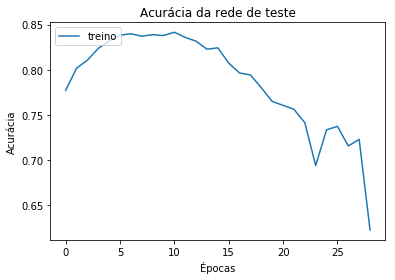

In [5]:
plt.plot(history.history['acc'])
plt.title('Acurácia da rede de teste')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['treino'], loc='upper left')
plt.show()

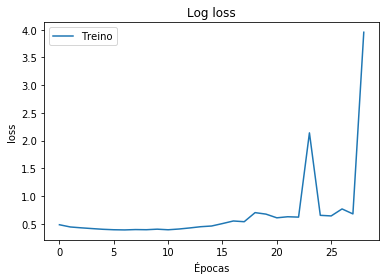

In [6]:
plt.plot(history.history['loss'])
plt.title('Log loss')
plt.ylabel('loss')
plt.xlabel('Épocas')
plt.legend(['Treino'], loc='upper left')
plt.show()

In [1]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                   
    img_tensor = np.expand_dims(img_tensor, axis=0)        
    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [ ]:
test_images =  [train_data_dir+"/dogs/"+i for i in os.listdir(train_data_dir+"/dogs")]